In [4]:
library(ggplot2)
library(dplyr)
library(qvalue)
library(UpSetR)

In [24]:
Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
G_file = read.csv(Giordanos_selection, sep = "\t")
nrow(G_file)
head(G_file,2)

[1] 21592

,gene,mean,std,CV,quartile_cv
2,ENSG00000227232,3.1805905,3.6232403,1.139172,2
3,ENSG00000243485,0.2003178,0.8649483,4.317881,3


In [62]:
df_common_genes = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods_and_bulk.csv")
common_genes = as.character(df_common_genes$gene)
length(common_genes)

[1] 12720

In [5]:
# person:
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206_cor/"
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
df1 = df1[df1$feature_id %in% common_genes,]
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
genes_pearson = unique(df1[df1$q_value<0.05,"feature_id"])

In [6]:
# spearman:
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206_corS/"
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
df1 = df1[df1$feature_id %in% common_genes,]
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
genes_spearman = unique(df1[df1$q_value<0.05,"feature_id"])

In [7]:
# LM:
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206_lm"
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
df1 = df1[df1$feature_id %in% common_genes,]
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
genes_lm = unique(df1[df1$q_value<0.05,"feature_id"])

In [8]:
# LMM:
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206"
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
df1 = df1[df1$feature_id %in% common_genes,]
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
genes_lmm = unique(df1[df1$q_value<0.05,"feature_id"])

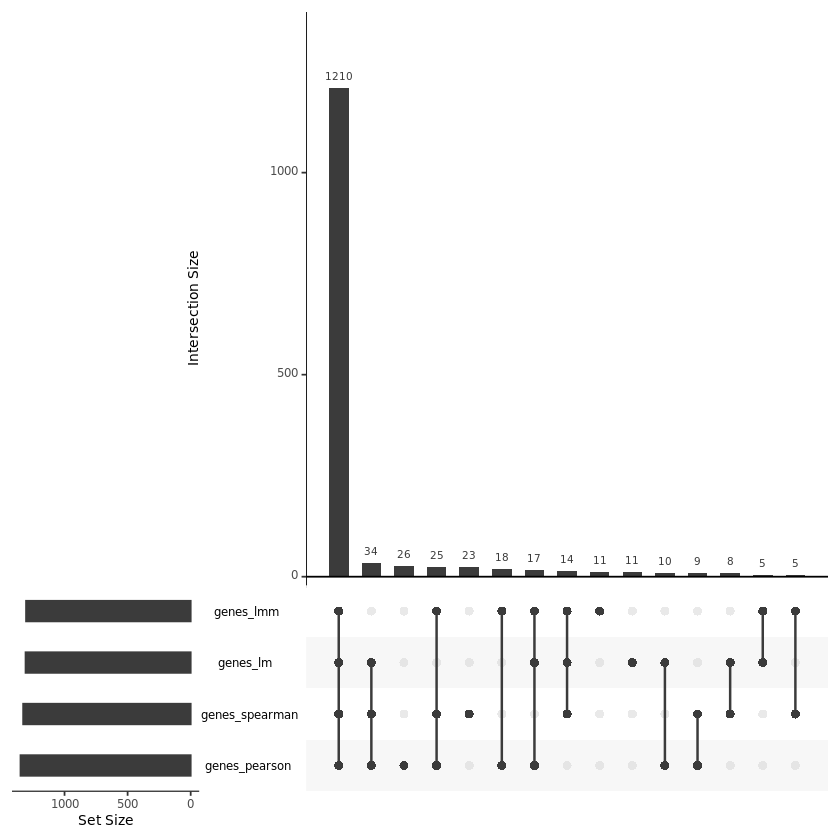

In [10]:
listInput = list(genes_pearson = genes_pearson, genes_spearman = genes_spearman, 
                 genes_lm = genes_lm, genes_lmm = genes_lmm)
upset(fromList(listInput), order.by = "freq")

In [113]:
# pearson:
file0 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_88_cor"
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206_cor"

In [114]:
df = read.csv(paste0(file0,"/top_qtl_results_all.txt"), sep = "\t")
# df = df[df$feature_id %in% G_file$gene,]
df = df[df$feature_id %in% common_genes,]
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
# max_qval
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star

[1] 0.05637187

In [115]:
df0 = read.csv(paste0(file0,"/qtl_results_all.txt"), sep = "\t")

In [116]:
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
# df1 = df1[df1$feature_id %in% G_file$gene,]
df1 = df1[df1$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value<0.05,"feature_id"]))

[1] 12720

[1] 1349

In [117]:
df2 = df1[df1$q_value < 0.05,]

In [118]:
df3 = inner_join(df2, df0, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1349

In [119]:
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star & 
         (df3$beta.sc*df3$beta.bulk)>0),])
# nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star),])

[1] 780

In [120]:
# # spearman:
file0 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_88_corS"
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206_corS"

In [121]:
df = read.csv(paste0(file0,"/top_qtl_results_all.txt"), sep = "\t")
# df = df[df$feature_id %in% G_file$gene,]
df = df[df$feature_id %in% common_genes,]
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
# max_qval
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star

[1] 0.05397051

In [122]:
df0 = read.csv(paste0(file0,"/qtl_results_all.txt"), sep = "\t")

In [123]:
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
# df1 = df1[df1$feature_id %in% G_file$gene,]
df1 = df1[df1$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value<0.05,"feature_id"]))

[1] 12720

[1] 1328

In [124]:
df2 = df1[df1$q_value < 0.05,]
df3 = inner_join(df2, df0, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1328

In [125]:
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star & 
         (df3$beta.sc*df3$beta.bulk)>0),])
# nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star),])

[1] 747

In [126]:
# LM:
file0 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_88_lm"
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206_lm"

In [127]:
df = read.csv(paste0(file0,"/top_qtl_results_all.txt"), sep = "\t")
# df = df[df$feature_id %in% G_file$gene,]
df = df[df$feature_id %in% common_genes,]
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
# max_qval
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star

[1] 0.05443498

In [128]:
df0 = read.csv(paste0(file0,"/qtl_results_all.txt"), sep = "\t")

In [129]:
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
# df1 = df1[df1$feature_id %in% G_file$gene,]
df1 = df1[df1$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value<0.05,"feature_id"]))

[1] 12720

[1] 1309

In [130]:
df2 = df1[df1$q_value < 0.05,]
df3 = inner_join(df2, df0, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1309

In [131]:
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star & 
         (df3$beta.sc*df3$beta.bulk)>0),])
# nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star),])

[1] 771

In [132]:
# LMM:
file0 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_PCA20_88_206"
file1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/Run_Output_PCA20_88_log_TPM_scater_libsize_206"

In [133]:
df = read.csv(paste0(file0,"/top_qtl_results_all.txt"), sep = "\t")
# df = df[df$feature_id %in% G_file$gene,]
df = df[df$feature_id %in% common_genes,]
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
# max_qval
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star

[1] 0.05473347

In [134]:
df1 = read.csv(paste0(file1,"/top_qtl_results_all.txt"), sep = "\t")
# df1 = df1[df1$feature_id %in% G_file$gene,]
df1 = df1[df1$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value<0.05,"feature_id"]))

[1] 12720

[1] 1305

In [135]:
df0 = read.csv(paste0(file0,"/qtl_results_all.txt"), sep = "\t")

In [136]:
df2 = df1[df1$q_value < 0.05,]
df3 = inner_join(df2, df0, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1305

In [137]:
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star & 
         (df3$beta.sc*df3$beta.bulk)>0),])
# nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star),])

[1] 767

In [2]:
df_common_genes = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods_and_bulk.csv")
common_genes = as.character(df_common_genes$gene)
length(common_genes)

[1] 12720

In [3]:
Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
G_file = read.csv(Giordanos_selection, sep = "\t")
nrow(G_file)
head(G_file,2)

[1] 21592

,gene,mean,std,CV,quartile_cv
2,ENSG00000227232,3.1805905,3.6232403,1.139172,2
3,ENSG00000243485,0.2003178,0.8649483,4.317881,3


In [4]:
##### Mean

In [5]:
mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/"

In [6]:
my_folder1 = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # lmm, 20PCs
my_folder2 = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206_lm/") # lm, 20PCs

In [7]:
df = read.csv(paste0(my_folder1,"top_qtl_results_all.txt"), sep = "\t")
# df = df[df$feature_id %in% G_file$gene,]
df = df[df$feature_id %in% common_genes,]
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues

In [8]:
df0 = read.csv(paste0(my_folder2,"top_qtl_results_all.txt"), sep = "\t")
# df0 = df0[df0$feature_id %in% G_file$gene,]
df0 = df0[df0$feature_id %in% common_genes,]
df0$q_value = qvalue(df0$empirical_feature_p_value)$qvalues

In [9]:
tail(df,2)
tail(df0,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
50759,3_72992872_G_A,0.0071248896,-0.3445302,0.1280329,0.215044167,3,72978195,72978744,87,87,0.906642,18.868283,3,72992872,A,1,0.2011494,0.7402040,ENSG00000242960,0.34151523
50767,3_75471725_A_G,0.0001192371,0.4504768,0.1170772,0.008375093,3,75470703,75484261,87,87,0.897265,7.740984,3,75471725,G,1,0.1896552,0.4950582,ENSG00000244026,0.05157168


,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
50759,3_72992872_G_A,0.0071248896,-0.3445302,0.1280329,0.2275680,3,72978195,72978744,87,87,0.7252600,24.67763,3,72992872,A,1,0.2011494,0.7402040,ENSG00000242960,0.34559279
50767,3_75471725_A_G,0.0001528257,0.4453397,0.1176146,0.0151937,3,75470703,75484261,87,87,0.7472277,18.67646,3,75471725,G,1,0.1896552,0.4950582,ENSG00000244026,0.07658584


In [10]:
length(unique(df[df$q_value < 0.05,"feature_id"]))
length(unique(df0[df0$q_value < 0.05,"feature_id"]))

[1] 1305

[1] 1309

In [11]:
df1 = inner_join(df, df0, by=c("feature_id","snp_id"), suffix = c(".lmm",".lm"))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

In [12]:
cor.test(df1$beta.lmm, df1$beta.lm)


	Pearson's product-moment correlation

data:  df1$beta.lmm and df1$beta.lm
t = 10498, df = 11854, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9999443 0.9999481
sample estimates:
      cor 
0.9999462 


In [13]:
cor.test(-log10(df1$p_value.lmm), -log10(df1$p_value.lm))


	Pearson's product-moment correlation

data:  -log10(df1$p_value.lmm) and -log10(df1$p_value.lm)
t = 4793.7, df = 11854, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9997327 0.9997513
sample estimates:
      cor 
0.9997422 


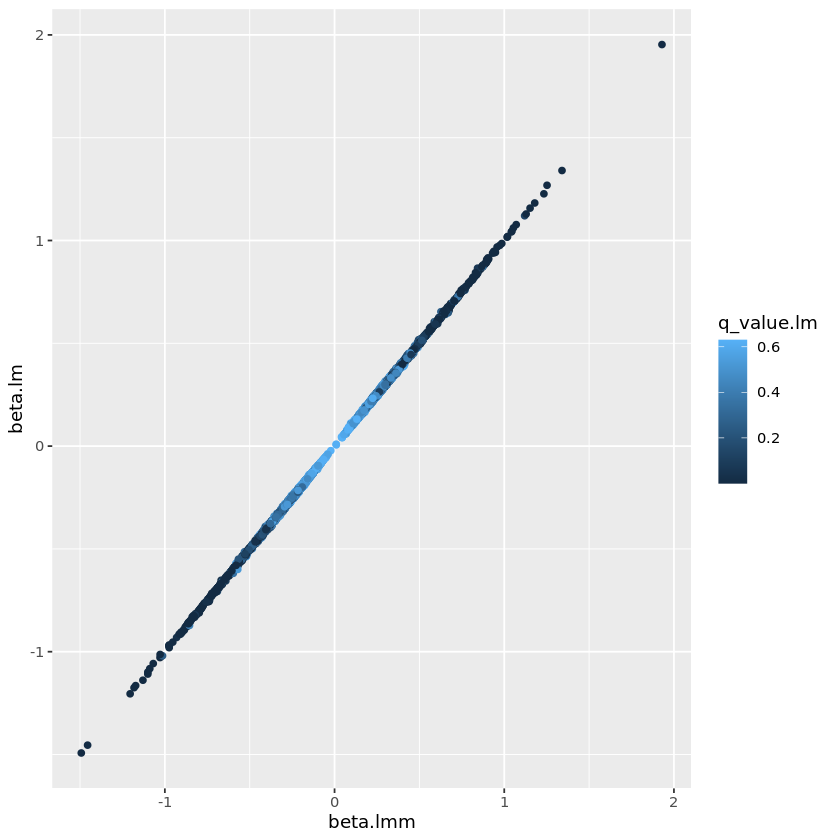

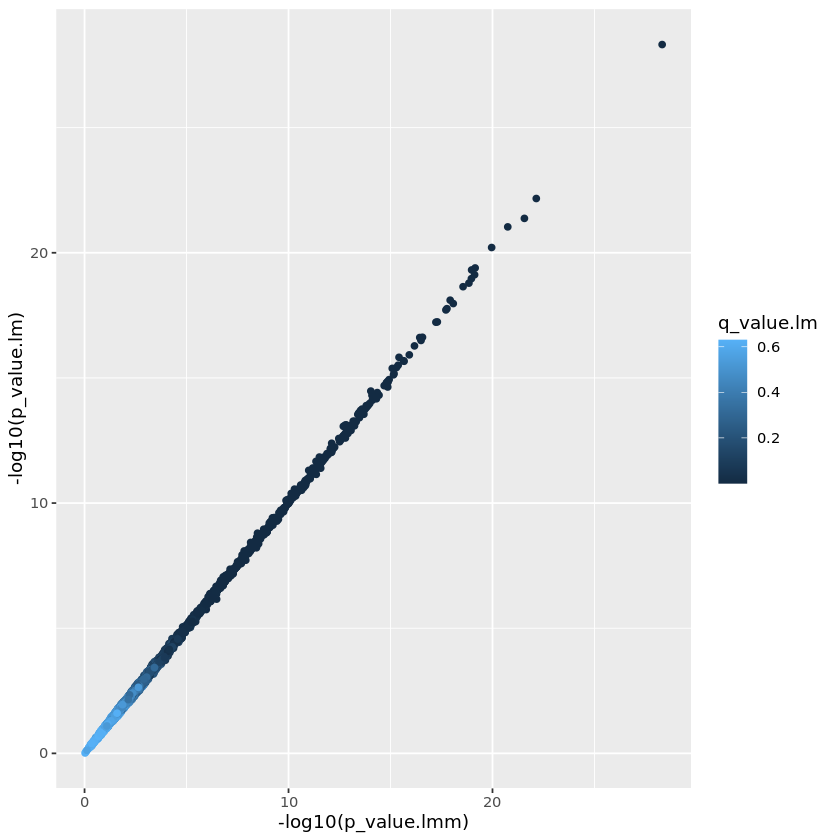

In [14]:
ggplot(df1, aes(x = beta.lmm, y = beta.lm, colour = q_value.lm)) + geom_point() 
ggplot(df1, aes(x = -log10(p_value.lmm), y = -log10(p_value.lm), colour = q_value.lm)) + geom_point() 

In [16]:
df0 = read.csv(paste0(my_folder1,"top_qtl_results_all.txt"), sep = "\t")
mean_genes = unique(df0$feature_id)
length(mean_genes)

[1] 50425

In [17]:
##### Total Mean

In [18]:
total_mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/"

In [19]:
my_folder = paste0(total_mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [20]:
# df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
# df <- df[order(df$empirical_feature_p_value, df$p_value ),]
# df0 <- df[-which(duplicated(df$feature_id)),]
# totmean_genes = unique(df0$feature_id)
# length(totmean_genes)

In [21]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totmean_genes = unique(df0$feature_id)
length(totmean_genes)

[1] 50429

In [22]:
##### Median

In [23]:
median_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/"

In [24]:
my_folder = paste0(median_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [26]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
median_genes = unique(df0$feature_id)
length(median_genes)

[1] 13628

In [27]:
# df0 = df0[df0$feature_id %in% common_genes,]
# length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))

[1] 13567

[1] 1499

[1] 10227

[1] 1129

In [ ]:
##### Total Median

In [29]:
totmedian_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/"

In [30]:
my_folder = paste0(totmedian_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [31]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totmedian_genes = unique(df0$feature_id)
length(totmedian_genes)

[1] 12727

In [31]:
##### Sum

In [32]:
sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/"

In [33]:
my_folder = paste0(sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [34]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]
sum_genes = unique(df0$feature_id)
length(sum_genes)

[1] 50427

In [35]:
##### Total Sum

In [36]:
total_sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totsum/"

In [37]:
my_folder = paste0(total_sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [38]:
df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
df <- df[order(df$empirical_feature_p_value, df$p_value ),]
df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)
length(unique(df0$feature_id))

[1] 50429

In [39]:
# df0 = df0[df0$feature_id %in% common_genes,]
# length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))

[1] 20545

[1] 1109

[1] 10767

[1] 823

In [40]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totsum_genes = unique(df0$feature_id)
length(totsum_genes)

[1] 50429

In [41]:
genes0 = mean_genes[mean_genes %in% totmean_genes]
length(genes0)
genes1 = genes0[genes0 %in% sum_genes]
length(genes1)
genes2 = genes1[genes1 %in% totsum_genes]
length(genes2)
common_genes = genes2
genes3 = genes2[genes2 %in% median_genes]
length(genes3)
genes4 = genes3[genes3 %in% totmedian_genes]
length(genes4)
common_genes = genes4

[1] 50425

[1] 50416

[1] 50416

[1] 13628

[1] 12726

In [42]:
length(common_genes)

[1] 12726

In [43]:
write.csv(data.frame(genes = common_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods.csv")

In [44]:
write.csv(data.frame(genes = mean_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/mean_genes.csv")
write.csv(data.frame(genes = totmean_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/totmean_genes.csv")
write.csv(data.frame(genes = median_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/median_genes.csv")
write.csv(data.frame(genes = totmedian_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/totmedian_genes.csv")
write.csv(data.frame(genes = sum_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/sum_genes.csv")
write.csv(data.frame(genes = totsum_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/totsum_genes.csv")

In [41]:
median = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/median_genes.csv")
median_genes = (unique(median$genes))

In [53]:
length(common_genes)
length(common_genes[common_genes %in% G_file$gene])
length(common_genes[common_genes %in% A_file$gene])

[1] 13177

[1] 13117

[1] 9886

In [426]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 = df0[df0$feature_id %in% common_genes,]
length(unique(df0$feature_id))

[1] 48570

In [427]:
# df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
# df <- df[order(df$empirical_feature_p_value, df$p_value ),]
# df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)

In [428]:
# totsum_genes = df0$feature_id

In [429]:
# length(totmean_genes)
# length(totmean_genes[totmean_genes %in% common_genes])

In [430]:
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))

[1] 19876

In [431]:
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
# c(nrow(df1[df1$BH_fdr < 0.05,]), nrow(df1[df1$BH_fdr < 0.05,])/nrow(df1))

[1] 1433

In [432]:
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))

[1] 10408

In [433]:
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))
# c(nrow(df2[df2$BH_fdr < 0.05,]), nrow(df2[df2$BH_fdr < 0.05,])/nrow(df2))

[1] 1045